In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
from sklearn.datasets import load_boston

In [56]:
data = load_boston()

In [57]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [58]:
df["price"] = data.target

In [59]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [60]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [61]:
correlation = df.corr()

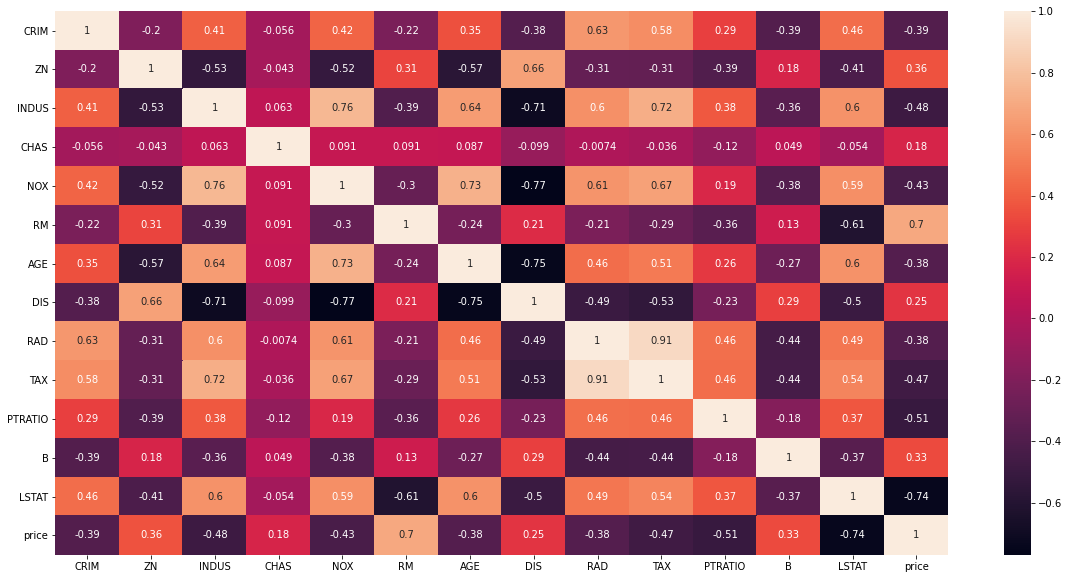

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)

##Train-Test-Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.2)

##Results without feature selection

###Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
l_reg = LinearRegression()

In [68]:
mse = cross_val_score(l_reg,x_train,y_train,scoring="neg_mean_squared_error",n_jobs=-1,cv = 5)

In [69]:
mse = np.mean(mse)

In [70]:
mse

-26.281568776763493

###Ridge Regression

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [72]:
ridge_reg = Ridge()
params = {'alpha':np.logspace(-8,4)}

In [73]:
ridge_regressor = GridSearchCV(ridge_reg,params,scoring="neg_mean_squared_error",cv = 5,n_jobs=-1)

In [74]:
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.75751062e-08, 3.08884360e-08, 5.42867544e-08,
       9.54095476e-08, 1.67683294e-07, 2.94705170e-07, 5.17947468e-07,
       9.10298178e-...
       6.86648845e-01, 1.20679264e+00, 2.12095089e+00, 3.72759372e+00,
       6.55128557e+00, 1.15139540e+01, 2.02358965e+01, 3.55648031e+01,
       6.25055193e+01, 1.09854114e+02, 1.93069773e+02, 3.39322177e+02,
       5.96362332e+02, 1.04811313e+03, 1.84206997e+03, 3.23745754e+03,
       5.68986603e+03, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [75]:
print(ridge_regressor.best_estimator_)

Ridge(alpha=0.040949150623804276, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)


In [76]:
print(ridge_regressor.best_params_)

{'alpha': 0.040949150623804276}


In [77]:
print(ridge_regressor.best_score_)

-26.279133379658305


In [78]:
##Observe the error is less than linear regression

##Lasso Regression

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso_reg = Lasso()

In [81]:
params = {'alpha':np.logspace(-8,4)}

In [82]:
lasso_regression = GridSearchCV(lasso_reg,params,scoring="neg_mean_squared_error",n_jobs=-1,cv = 5)

In [83]:
lasso_regression.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.75751062e-08, 3.08884360e-08, 5.42867544e-08,
       9.54095476e-08, 1....
       6.86648845e-01, 1.20679264e+00, 2.12095089e+00, 3.72759372e+00,
       6.55128557e+00, 1.15139540e+01, 2.02358965e+01, 3.55648031e+01,
       6.25055193e+01, 1.09854114e+02, 1.93069773e+02, 3.39322177e+02,
       5.96362332e+02, 1.04811313e+03, 1.84206997e+03, 3.23745754e+03,
       5.68986603e+03, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [84]:
lasso_regression.best_params_

{'alpha': 1e-08}

In [85]:
lasso_regression.best_score_

-26.281568821963333

###Performance Check

In [87]:
l_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
#Linear Regression
y_pred = l_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


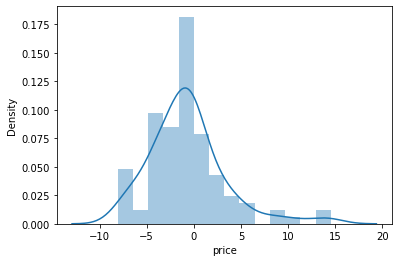

In [89]:
sns.distplot(y_test-y_pred)

In [90]:
#Ridge Regression
y_pred = ridge_regressor.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


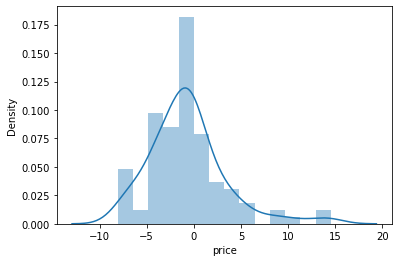

In [91]:
sns.distplot(y_test-y_pred)

In [92]:
#Lasso Regression

In [93]:
y_pred = lasso_regression.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


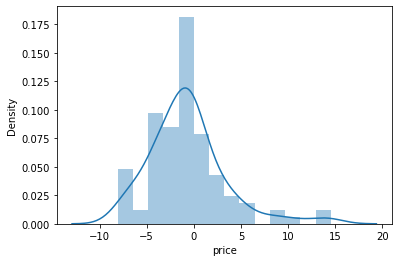

In [94]:
sns.distplot(y_test-y_pred)